# FYS-STK4155 Project 1 
## Nanna Bryne and Johan M. Kroken
### Tentative work in jupyter notebook

/tmp/ipykernel_6093/4285705529.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


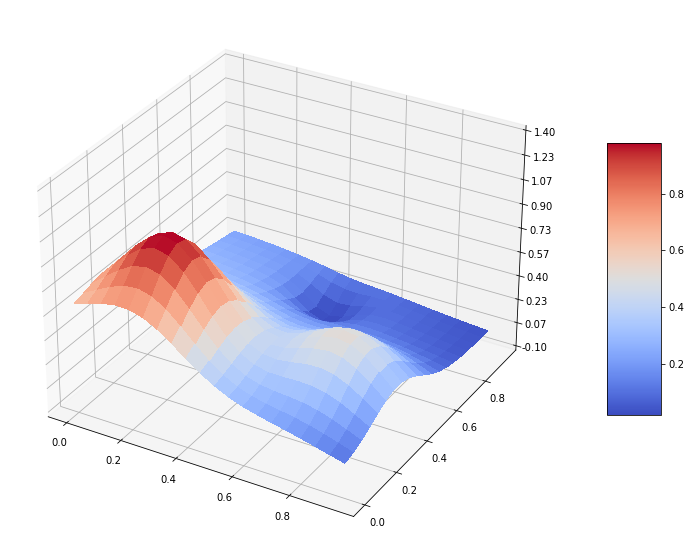

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
import numpy as np
from random import random, seed
from src.designMatrix import DesignMatrix
from src.Regression import LeastSquares
# from src.Regression import LeastSquares


plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)
z /= z.max()

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [99]:
#   useful functions:
#   mean squared error
def MSE(data, model):
    n = np.size(data)
    return np.sum((data-model)**2)/n

#   r2 score
def R2(data, model):
    return 1 - np.sum((data - model) ** 2) / np.sum((data - np.mean(data)) ** 2)


In [101]:



N = 7
mses = np.zeros(N)
r2s = np.zeros(N)
ns = np.zeros(N)
i = 0
for n in range(1,N+1):
    print(f"n={n}")
    Xt = DesignMatrix(n)
    Xt.create_X(x, y)   
    LS = LeastSquares(z, Xt)
    LS.split(scaler="none")
    LS._manOLS()
    ztilde = Xt.X @ LS.beta 
    ztilde = np.reshape(ztilde, (20,20))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(x, y, ztilde, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.suptitle(f"n={n}", fontsize=20)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    mse = MSE(z.ravel(), ztilde.ravel())
    r2 = R2(z.ravel(), ztilde.ravel())
    mses[i] = mse 
    r2s[i] = r2 
    ns[i] = n
    i += 1

    plt.show()

n=1


TypeError: LeastSquares.__init__() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
fig, ax = plt.subplots()
plt.plot(ns, mses/mses.max(), label="MSE")
plt.plot(ns, r2s/r2s.max(), label="R2")
plt.legend()
# plt.tight_layout()
plt.show()

In [ ]:
#   Split data
N = 7
for n in range(1,N+1):
    X = fill_design_matrix(n)
    t_size = 0.8 # use 80% of the data as training data. 
    X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), train_size=t_size)


    #   find beta from train data

    H_train = X_train.T @ X_train
    beta_train = np.linalg.pinv(H_train) @ X_train.T @ z_train

    H_test = X_test.T @ X_test
    beta_test = np.linalg.pinv(H_test) @ X_test.T @ z_test


    plt.plot(range(1, len(beta_train)+1), beta_train, label=f"n={n}")
    # plt.plot(range(1, len(beta_test)+1), beta_test, label="test")
    plt.legend()
plt.show()
